Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Book_Name    996 non-null    object
 1   book_id      996 non-null    object
 2   guten_genre  996 non-null    object
 3   Author_Name  996 non-null    object
dtypes: object(4)
memory usage: 287.5 KB
                                           Book_Name       book_id  \
0  The Mystery of the Boule Cabinet: A Detective ...  pg10067.epub   
1                                          The Pupil   pg1032.epub   
2                                     At Love's Cost  pg10379.epub   
3                             The Heart of the Range  pg10473.epub   
4                        The Worshipper of the Image  pg10812.epub   

             guten_genre               Author_Name  
0  Detective and Mystery  Stevenson| Burton Egbert  
1               Literary              James| Henry  
2            

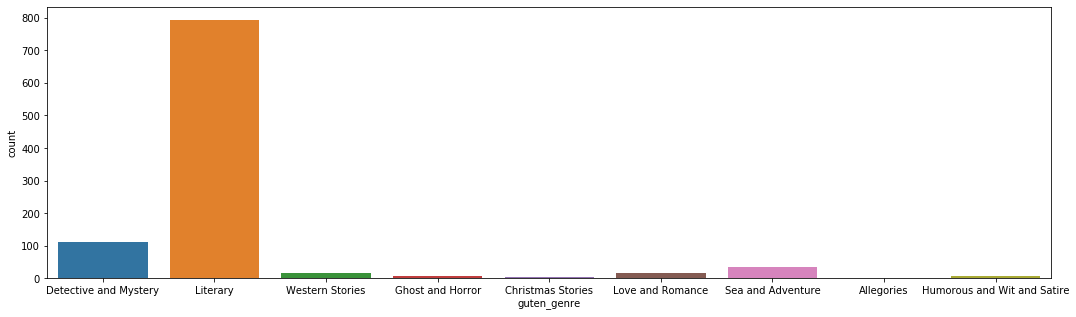

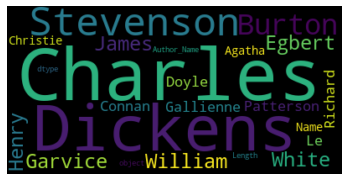

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_Name  5 non-null      object
 1   Data       5 non-null      object
 2   FileNo     5 non-null      int32 
dtypes: int32(1), object(2)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File_Name    5 non-null      object
 1   Data         5 non-null      object
 2   FileNo       5 non-null      int32 
 3   Book_Name    5 non-null      object
 4   book_id      5 non-null      object
 5   guten_genre  5 non-null      object
 6   Author_Name  5 non-null      object
dtypes: int32(1), object(6)
memory usage: 300.0+ bytes


,Data,FileNo,Book_Name,guten_genre,Author_Name
0,"<p>Sir Walter Elliot, of Kellynch Hall, in Som...",105,Persuasion,Literary,Austen| Jane
1,<p>It was in the spring of the year 1894 that ...,108,Return of Sherlock Holmes,Detective and Mystery,Connan| Doyle
2,<p>Alice was beginning to get very tired of si...,11,Alice's Adventures in Wonderland,Literary,Carroll| Lewis
3,"<p>One thing was certain, that the white kitte...",12,Through the Looking-Glass,Literary,Carroll| Lewis
4,<p>!!!! Book the First - Recalled to Life I. ...,98,A Tale of Two Cities,Literary,Dickens| Charles


In [2]:
############################################################################
################## Importing Required Pacakges##############################
############################################################################

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re
import os


""" This block is for EDA on the given data"""

####################Importing csv file with names and authors################

#Assuming File location is local "Need to change it"

#Getting data into dataframe

%time
data = pd.read_csv("master996.csv", delimiter=';',encoding= 'unicode_escape')

#Checking memory usage in detail with distribution of data
data.info(memory_usage="deep")

#Checking the first 5 lines of the file

print(data.head(5))

#Chcking the shape of the dataframe

data.shape

#Checking the count of the values in dataframe, should match wiht the file

data.count()

#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

#Checkign the values

data.head(5)

#Checking Null Values

data.info() 

#There are no null values

#Getting list of gernes

print(data.guten_genre.value_counts().unique())

#Checking distribution of Gerne columns

data.guten_genre.describe()

#Getting distribution of authors

data.Author_Name.describe()

""" List is quite long"""

#Getting list of authors

# print(data.Author_Name.unique())


##################################### Trying some plots on the file ######################################

plt.figure(figsize=(18,5))

#See how much the Gernes are distributed
sns.countplot(data['guten_genre'])
plt.show()

"""Clearly Classes are imbalanced, Literarcy genre has higest values and Allegories almost have no books"""

#chekcing the actualy counts of each gerne

data.guten_genre.value_counts()


"""
Literary                       794
Detective and Mystery          111
Sea and Adventure               36
Love and Romance                18
Western Stories                 18
Humorous and Wit and Satire      6
Ghost and Horror                 6
Christmas Stories                5
Allegories                       2

"""

### Wordcloud to see most frequent author ###

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(str(data['Author_Name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

"""Looks like we have most fictions from Charles dickson and Stevenson"""


##################################  Here add more analysis and graphs for more insigths #####################
#############################################################################################################



# Add here number of books per author

# Add here number of gerne per author



################################################################################################################
##################################Importing html content into pnadas and joining it wiht meta data##############

import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit
files = glob.glob("Books\*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')

#Can check for few files from below code        
"""for i in data:
    print(i, data[i])
"""
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()
#Renaming column names
df.columns = ['File_Name', 'Data']
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)

df.info(memory_usage="deep")

left = df
right = data

#merging by matching the bookid, ignoring which files has not match
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

#Checking resulting dataframe
result.info()

#Dropping unnecessery columns

books=result.drop(['File_Name', 'book_id'], axis=1)
books.head(5)




In [3]:
##################################### Pre-Processing of the html file content########################################

from sklearn import preprocessing
from bs4 import BeautifulSoup
import string

# labeling the classes

le = preprocessing.LabelEncoder()
books['guten_genre'] = le.fit_transform(books['guten_genre'])

#checking raw content
books['Data'].head(5)

#cleaning it with soup
books['Data']= [BeautifulSoup(text).get_text() for text in books['Data'] ]

#Make everything in lowe case
books['Data'] = books['Data'].apply(lambda x: x.lower())

#Remove puchtuation
books['Data'] = books['Data'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

#Remove Digits
books['Data'] = books['Data'].apply(lambda x: x.translate(str.maketrans('','', string.digits)))
books['Data'].str.strip()

books['Data'].head(5)

0    sir walter elliot of kellynch hall in somerset...
1    it was in the spring of the year  that all lon...
2    alice was beginning to get very tired of sitti...
3    one thing was certain that the white kitten ha...
4      book the first  recalled to life i   the per...
Name: Data, dtype: object

(5, 12818)


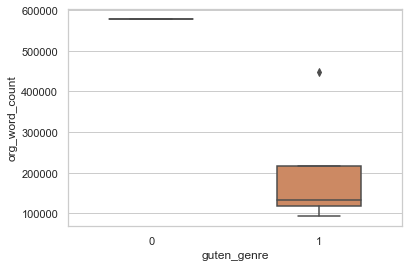

In [6]:
######################################## Changin into martix #########################################3

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_fit=cv.fit_transform(books['Data'])

#Checking number of documetns and unique words in it

print(cv_fit.shape)

""" (5, 12526)"""

#String original length of each book
books['org_word_count'] = books['Data'].apply(len)
books

#Plotting the grpah for each gerne by original word count
sns.set(style="whitegrid")
#Bar Graph
#ax = sns.barplot(x="guten_genre", y="org_word_count", data=books)
ax = sns.boxplot(x="guten_genre", y="org_word_count", data=books, width=.5)

#Adding count of unique words in each book

#### In Prgoress . Priyam/ 05/04/2020


#books['uniq_cnt'] = cv.fit_transform(books['Data']).apply(lambda x: x.toarray().sum(axis=1))
#books['uniq_cnt'] = (lambda x: (cv.fit_transform(books['Data']).toarray().sum(axis=1)))
#books




